In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv("export.csv")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   ranking            1000 non-null   int64  
 2   temp_ranking       39 non-null     float64
 3   previous_ranking   0 non-null      float64
 4   company_name       1000 non-null   object 
 5   city               929 non-null    object 
 6   country            913 non-null    object 
 7   state              671 non-null    object 
 8   current_employees  1000 non-null   int64  
 9   last_employees     1000 non-null   int64  
 10  employee_growth    1000 non-null   float64
 11  founded            712 non-null    float64
 12  total_funding      558 non-null    object 
 13  linkedin_url       1000 non-null   object 
 14  url                999 non-null    object 
 15  Industry           997 non-null    object 
 16  Points             1000 n

In [50]:
df=df.drop(["temp_ranking","previous_ranking"],axis=1)

In [51]:
df["city"] = df["city"].notnull().astype(int)

In [52]:
df=df.drop(["valuation_as_of"],axis=1)

In [53]:
df=df.drop(["Contact Data"],axis=1)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   ranking            1000 non-null   int64  
 2   company_name       1000 non-null   object 
 3   city               1000 non-null   int64  
 4   country            913 non-null    object 
 5   state              671 non-null    object 
 6   current_employees  1000 non-null   int64  
 7   last_employees     1000 non-null   int64  
 8   employee_growth    1000 non-null   float64
 9   founded            712 non-null    float64
 10  total_funding      558 non-null    object 
 11  linkedin_url       1000 non-null   object 
 12  url                999 non-null    object 
 13  Industry           997 non-null    object 
 14  Points             1000 non-null   int64  
 15  valuation          181 non-null    float64
dtypes: float64(3), int64(6), 

In [55]:
df["state"] = df["state"].notnull().astype(int)
df["country"] = df["country"].notnull().astype(int)
df["founded"] = df["founded"].notnull().astype(int)
df["valuation"]=df["valuation"].fillna(0)
df["url"] = df["url"].notnull().astype(int)
df["linkedin_url"] = df["linkedin_url"].notnull().astype(int)

In [56]:
df.head()

,id,ranking,company_name,city,country,state,current_employees,last_employees,employee_growth,founded,total_funding,linkedin_url,url,Industry,Points,valuation
0,1045228,1,Anysphere,1,1,1,577,54,166.67,0,$176M,1,1,AI,3002,2.500000e+09
1,966653,2,ElevenLabs,1,1,1,333,115,181.32,1,$353M,1,1,AI,2721,3.300000e+09
2,977455,3,Mistral AI,1,1,0,360,119,204.44,1,$1.19B,1,1,AI,2545,6.000000e+09
3,976147,4,Figure,1,1,1,370,174,112.82,1,$845M,1,1,Robotics,2384,2.600000e+09
4,376099,5,Abridge,1,1,1,326,120,171.67,1,$464M,1,1,AI,2366,5.300000e+09


In [57]:
df["Industry"].value_counts()
s=df.groupby("Industry")["valuation"].sum().head(10)

In [58]:
def money_to_int(money_str):
    if pd.isna(money_str):
        return np.nan # or return None if you want to keep NaNs

    money_str = str(money_str).strip()  # convert to string and strip spaces
    
    multiplier = 1
    number = None
    
    if money_str.endswith('M'):
        multiplier = 1_000_000
        number = money_str.lstrip('$').rstrip('M')
    elif money_str.endswith('K'):
        multiplier = 1_000
        number = money_str.lstrip('$').rstrip('K')
    else:
        # Handles cases with no suffix, just numbers with or without $
        number = money_str.lstrip('$')
    
    try:
        return int(float(number) * multiplier)
    except ValueError:
        # In case the string is not a valid number
        return np.nan


In [59]:
df["total_funding"]=df["total_funding"].apply(money_to_int)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   ranking            1000 non-null   int64  
 2   company_name       1000 non-null   object 
 3   city               1000 non-null   int64  
 4   country            1000 non-null   int64  
 5   state              1000 non-null   int64  
 6   current_employees  1000 non-null   int64  
 7   last_employees     1000 non-null   int64  
 8   employee_growth    1000 non-null   float64
 9   founded            1000 non-null   int64  
 10  total_funding      526 non-null    float64
 11  linkedin_url       1000 non-null   int64  
 12  url                1000 non-null   int64  
 13  Industry           997 non-null    object 
 14  Points             1000 non-null   int64  
 15  valuation          1000 non-null   float64
dtypes: float64(3), int64(11),

In [67]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df["valuation"]=scaler.fit_transform(df[["valuation"]])

In [74]:
df["valuation"]

0      13.008773
1      17.171581
2      31.221055
3      13.529124
4      27.578599
         ...    
995     0.000000
996     0.000000
997     0.000000
998     0.000000
999     0.000000
Name: valuation, Length: 1000, dtype: float64

<Axes: xlabel='current_employees', ylabel='valuation'>

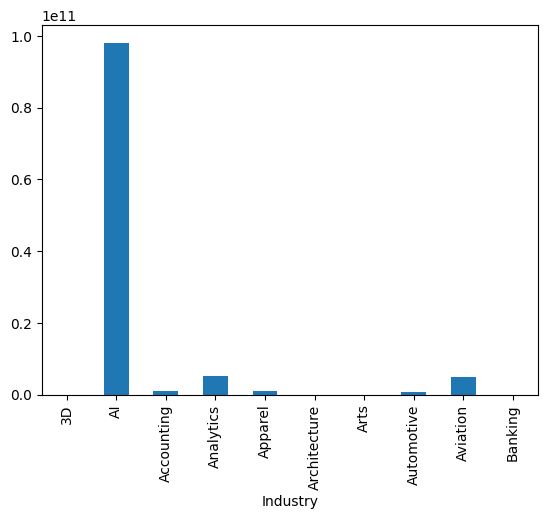

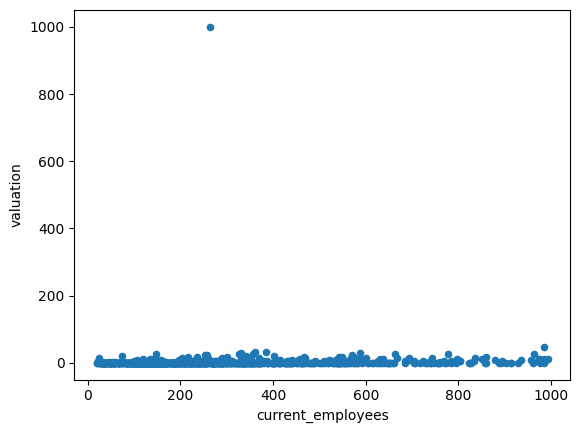

In [75]:
s.plot(kind='bar')
df.plot.scatter(x='current_employees', y='valuation')

In [76]:
#remove the outlier for proper analysis
df=df[df["valuation"]<500]

In [77]:
df.shape

(999, 16)

<Axes: xlabel='current_employees', ylabel='valuation'>

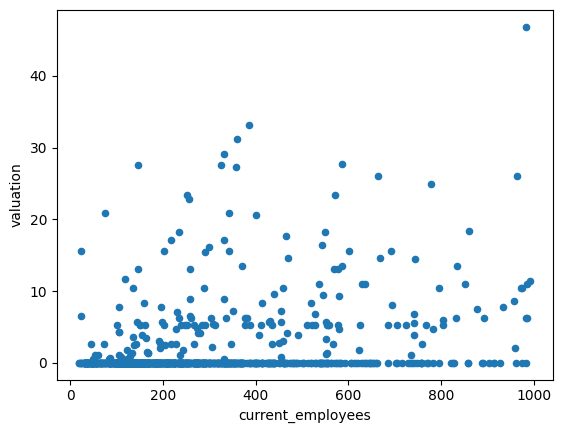

In [78]:
df.plot.scatter(x='current_employees', y='valuation')

In [79]:
df.head()

,id,ranking,company_name,city,country,state,current_employees,last_employees,employee_growth,founded,total_funding,linkedin_url,url,Industry,Points,valuation
0,1045228,1,Anysphere,1,1,1,577,54,166.67,0,176000000.0,1,1,AI,3002,13.008773
1,966653,2,ElevenLabs,1,1,1,333,115,181.32,1,353000000.0,1,1,AI,2721,17.171581
2,977455,3,Mistral AI,1,1,0,360,119,204.44,1,NaN,1,1,AI,2545,31.221055
3,976147,4,Figure,1,1,1,370,174,112.82,1,845000000.0,1,1,Robotics,2384,13.529124
4,376099,5,Abridge,1,1,1,326,120,171.67,1,464000000.0,1,1,AI,2366,27.578599


In [82]:
df["total_funding"]=df["total_funding"].fillna(df["total_funding"].mean())

C:\Users\debji\AppData\Local\Temp\ipykernel_19680\3386432011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_funding"]=df["total_funding"].fillna(df["total_funding"].mean())


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 999 non-null    int64  
 1   ranking            999 non-null    int64  
 2   company_name       999 non-null    object 
 3   city               999 non-null    int64  
 4   country            999 non-null    int64  
 5   state              999 non-null    int64  
 6   current_employees  999 non-null    int64  
 7   last_employees     999 non-null    int64  
 8   employee_growth    999 non-null    float64
 9   founded            999 non-null    int64  
 10  total_funding      999 non-null    float64
 11  linkedin_url       999 non-null    int64  
 12  url                999 non-null    int64  
 13  Industry           996 non-null    object 
 14  Points             999 non-null    int64  
 15  valuation          999 non-null    float64
dtypes: float64(3), int64(11), objec

In [84]:
#scaling all values from 0 to 1
df["valuation"]=scaler.fit_transform(df[["valuation"]])
df["current_employees"]=scaler.fit_transform(df[["current_employees"]])
df["employee_growth"]=scaler.fit_transform(df[["employee_growth"]])
df["total_funding"]=scaler.fit_transform(df[["total_funding"]])



C:\Users\debji\AppData\Local\Temp\ipykernel_19680\3127994100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["valuation"]=scaler.fit_transform(df[["valuation"]])
C:\Users\debji\AppData\Local\Temp\ipykernel_19680\3127994100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["current_employees"]=scaler.fit_transform(df[["current_employees"]])
C:\Users\debji\AppData\Local\Temp\ipykernel_19680\3127994100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [85]:
df.head()

,id,ranking,company_name,city,country,state,current_employees,last_employees,employee_growth,founded,total_funding,linkedin_url,url,Industry,Points,valuation
0,1045228,1,Anysphere,1,1,1,0.572456,54,0.114597,0,0.185263,1,1,AI,3002,0.277778
1,966653,2,ElevenLabs,1,1,1,0.321686,115,0.124704,1,0.371579,1,1,AI,2721,0.366667
2,977455,3,Mistral AI,1,1,0,0.349435,119,0.140655,1,0.186261,1,1,AI,2545,0.666667
3,976147,4,Figure,1,1,1,0.359712,174,0.077444,1,0.889474,1,1,Robotics,2384,0.288889
4,376099,5,Abridge,1,1,1,0.314491,120,0.118046,1,0.488421,1,1,AI,2366,0.588889


In [106]:
#extracting all important features
#Adding a new feature called label that tells wheather the data of the company is a hot lead or not (1-yes 0- No)

new_df=df[["city",'country','state','linkedin_url','url','founded','current_employees','employee_growth','total_funding','valuation']]
new_df['Label'] = (new_df.iloc[:,0:6]).sum(axis=1) + new_df.iloc[:,6:].sum(axis=1)*5
new_df["Label"] = new_df["Label"].apply(lambda x:int(x>new_df["Label"].mean()))

C:\Users\debji\AppData\Local\Temp\ipykernel_19680\388478208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Label'] = (new_df.iloc[:,0:6]).sum(axis=1) + new_df.iloc[:,6:].sum(axis=1)*5
C:\Users\debji\AppData\Local\Temp\ipykernel_19680\388478208.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Label"] = new_df["Label"].apply(lambda x:int(x>new_df["Label"].mean()))


In [108]:
new_df.head()

,city,country,state,linkedin_url,url,founded,current_employees,employee_growth,total_funding,valuation,Label
0,1,1,1,1,1,0,0.572456,0.114597,0.185263,0.277778,1
1,1,1,1,1,1,1,0.321686,0.124704,0.371579,0.366667,1
2,1,1,0,1,1,1,0.349435,0.140655,0.186261,0.666667,1
3,1,1,1,1,1,1,0.359712,0.077444,0.889474,0.288889,1
4,1,1,1,1,1,1,0.314491,0.118046,0.488421,0.588889,1


In [109]:
#adding this label to the original data
df["Label"] = new_df["Label"]

C:\Users\debji\AppData\Local\Temp\ipykernel_19680\3937684626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Label"] = new_df["Label"]


In [110]:
df

,id,ranking,company_name,city,country,state,current_employees,last_employees,employee_growth,founded,total_funding,linkedin_url,url,Industry,Points,valuation,Label
0,1045228,1,Anysphere,1,1,1,0.572456,54,0.114597,0,0.185263,1,1,AI,3002,0.277778,1
1,966653,2,ElevenLabs,1,1,1,0.321686,115,0.124704,1,0.371579,1,1,AI,2721,0.366667,1
2,977455,3,Mistral AI,1,1,0,0.349435,119,0.140655,1,0.186261,1,1,AI,2545,0.666667,1
3,976147,4,Figure,1,1,1,0.359712,174,0.077444,1,0.889474,1,1,Robotics,2384,0.288889,1
4,376099,5,Abridge,1,1,1,0.314491,120,0.118046,1,0.488421,1,1,AI,2366,0.588889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1024728,996,Renaissance Technologies,1,1,1,0.029805,35,0.027638,1,0.186261,1,1,Investments,413,0.000000,0
996,1018840,997,Electronics and Electrical Design,1,1,0,0.215827,60,0.195498,1,0.186261,1,1,Electronics,413,0.000000,0
997,350993,998,Oxford Quantum Circuits,1,1,0,0.117163,104,0.019615,1,0.166316,1,1,Tech Services,412,0.000000,0
998,328492,999,Mosaic Manufacturing,1,1,1,0.085303,80,0.019173,1,0.030737,1,1,3D,412,0.000000,0


In [115]:
#Now we will generate a lead score 
#Lead score will tell us how much lead we can find from a company given its data
#we will use logistic regression for this

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(new_df.iloc[:,0:-1], new_df.iloc[:,-1], test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict_proba(X_test)

In [ ]:
y_pred=y_pred[:,1]

In [119]:
y_pred=y_pred.round(3)

In [120]:
y_pred

array([0.19 , 0.62 , 0.304, 0.275, 0.057, 0.575, 0.538, 0.028, 0.919,
       0.48 , 0.009, 0.109, 0.008, 0.703, 0.626, 0.651, 0.111, 0.002,
       0.217, 0.67 , 0.842, 0.005, 0.051, 0.018, 0.849, 0.977, 0.999,
       0.175, 0.606, 0.019, 0.061, 0.186, 0.249, 0.157, 0.338, 0.247,
       0.682, 0.684, 0.948, 0.356, 0.204, 0.202, 0.723, 0.217, 0.983,
       0.344, 0.05 , 0.106, 0.227, 0.026, 0.022, 0.591, 0.009, 0.427,
       0.477, 1.   , 0.998, 0.553, 0.339, 0.205, 0.838, 0.963, 0.004,
       0.142, 0.652, 0.267, 0.662, 0.985, 0.222, 0.508, 0.679, 0.965,
       0.04 , 0.955, 0.042, 0.354, 0.968, 0.45 , 0.305, 0.038, 0.308,
       0.341, 0.994, 0.799, 0.506, 0.014, 0.001, 0.159, 0.261, 0.725,
       0.429, 0.382, 0.096, 0.441, 0.807, 0.99 , 0.186, 0.461, 0.188,
       0.526, 0.027, 0.847, 0.153, 0.197, 0.143, 0.03 , 0.871, 0.424,
       0.219, 0.064, 0.307, 0.731, 0.954, 0.228, 0.063, 0.31 , 0.1  ,
       0.587, 0.606, 0.595, 0.232, 0.429, 0.042, 0.855, 0.991, 0.088,
       0.772, 0.512,

In [121]:
#now we can calculate it for all the data and assign them
final = model.predict_proba(new_df.iloc[:,0:-1])[:,1].round(3)

In [123]:
final.shape

(999,)

In [125]:
data=pd.read_csv("export.csv")
data=data[data["valuation"]!=data["valuation"].max()]

In [127]:
data.shape

(999, 20)

In [128]:
data["Lead_Score(%)"] = final*100

In [ ]:
data.head(20)

,id,ranking,temp_ranking,previous_ranking,company_name,city,country,state,current_employees,last_employees,...,founded,total_funding,linkedin_url,url,Industry,Points,valuation,valuation_as_of,Contact Data,Lead_Score(%)
0,1045228,1,NaN,NaN,Anysphere,San Francisco,United States,CA,577,54,...,NaN,$176M,http://www.linkedin.com/company/anysphereinc,anysphere.inc,AI,3002,2.500000e+09,January 2025,For Contacts and mobile phone number see lead411,92.3
1,966653,2,NaN,NaN,ElevenLabs,New York,United States,NY,333,115,...,2022.0,$353M,http://www.linkedin.com/company/elevenlabsio,elevenlabs.io,AI,2721,3.300000e+09,January 2025,For Contacts and mobile phone number see lead411,96.2
2,977455,3,NaN,NaN,Mistral AI,Paris,FRA,NaN,360,119,...,2023.0,$1.19B,http://www.linkedin.com/company/mistralai,mistral.ai,AI,2545,6.000000e+09,June 2024,For Contacts and mobile phone number see lead411,86.6
3,976147,4,NaN,NaN,Figure,Sunnyvale,United States,CA,370,174,...,2022.0,$845M,http://www.linkedin.com/company/figure-ai,figure.ai,Robotics,2384,2.600000e+09,March 2024,For Contacts and mobile phone number see lead411,99.6
4,376099,5,NaN,NaN,Abridge,Pittsburgh,United States,PA,326,120,...,2018.0,$464M,http://www.linkedin.com/company/abridgehq,abridge.com,AI,2366,5.300000e+09,May 2025,For Contacts and mobile phone number see lead411,98.7
5,174917,6,NaN,NaN,Lightmatter,Boston,United States,MA,257,184,...,2017.0,$422M,http://www.linkedin.com/company/lightmatter,lightmatter.co,Hardware,2332,4.400000e+09,October 2024,For Contacts and mobile phone number see lead411,94.0
6,9967,7,5685.0,NaN,Shield AI,San Diego,United States,CA,147,114,...,2015.0,$1.31B,http://www.linkedin.com/company/shield-ai,shield.ai,AI,2328,5.300000e+09,March 2025,For Contacts and mobile phone number see lead411,70.0
7,990745,8,NaN,NaN,Mercor,San Francisco,United States,CA,555,107,...,2023.0,$135M,http://www.linkedin.com/company/mercor-ai,mercor.com,AI,2292,2.500000e+08,September 2024,For Contacts and mobile phone number see lead411,97.9
8,981798,9,NaN,NaN,Saronic Technologies,Austin,United States,TX,342,114,...,2022.0,$845M,http://www.linkedin.com/company/saronic-techno...,saronic.com,Defense,2231,4.000000e+09,February 2025,For Contacts and mobile phone number see lead411,99.8
9,977489,10,NaN,NaN,Together AI,San Francisco,United States,CA,217,82,...,2022.0,$537M,http://www.linkedin.com/company/togethercomputer,together.ai,AI,2228,3.300000e+09,March 2024,For Contacts and mobile phone number see lead411,96.3


In [130]:
data["Lead_Score(%)"].mean()

np.float64(43.088688688688684)

In [131]:
import joblib

# Save model to file
joblib.dump(model, 'lead_score_model.pkl')

['lead_score_model.pkl']